In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/test_loan.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

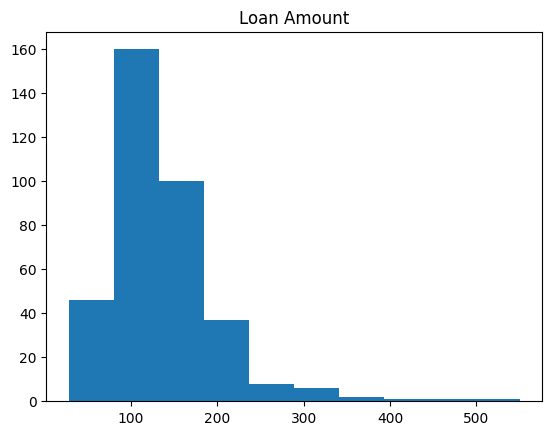

In [ ]:
plt.hist(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [ ]:
# looks like it is a normal ditrbution

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

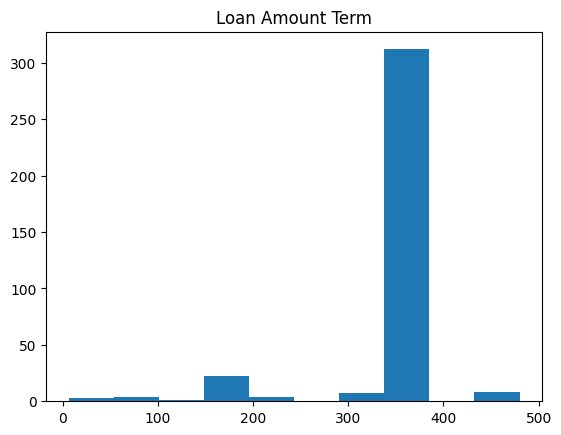

In [ ]:
plt.hist(data['Loan_Amount_Term'])
plt.title('Loan Amount Term')
plt.show()

In [ ]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [ ]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

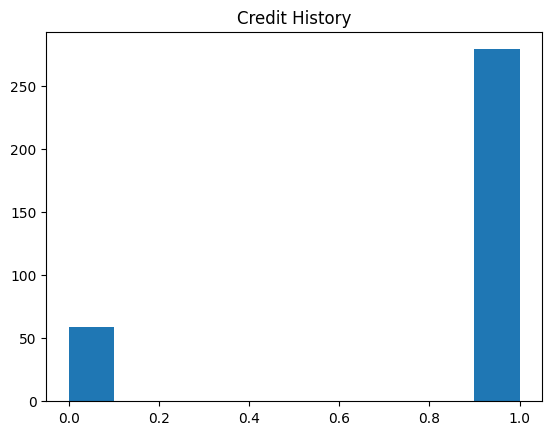

In [ ]:
plt.hist(data['Credit_History'])
plt.title('Credit History')
plt.show()

In [ ]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [ ]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

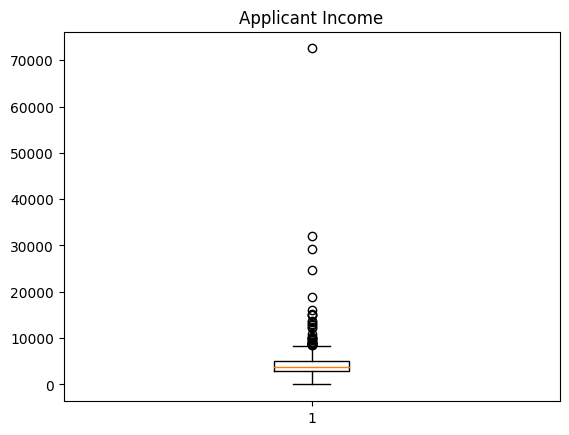

In [ ]:
plt.boxplot(data['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

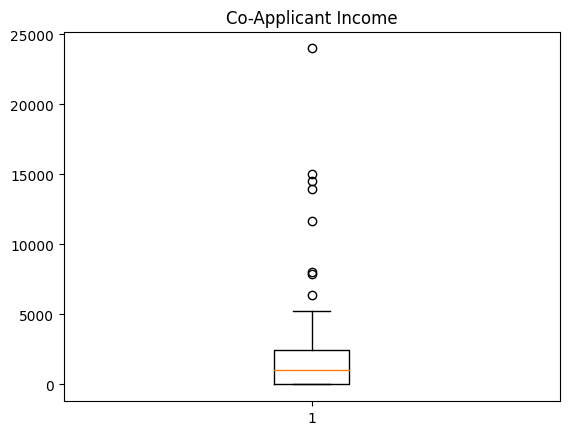

In [ ]:
plt.boxplot(data['CoapplicantIncome'])
plt.title('Co-Applicant Income')
plt.show()

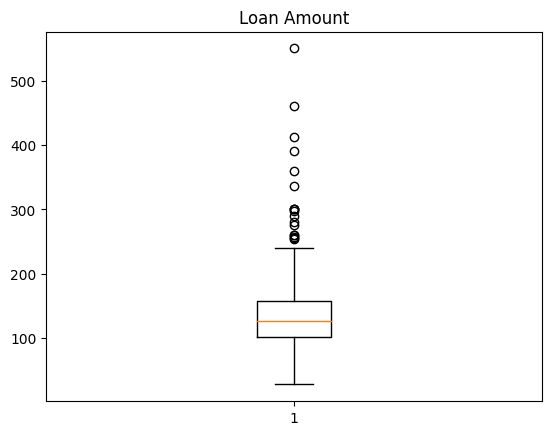

In [ ]:
plt.boxplot(data['LoanAmount'])
plt.title('Loan Amount')
plt.show()


OUTLIERS HANDLING

In [ ]:
Q1a = data['ApplicantIncome'].quantile(0.25)
Q2a = data['ApplicantIncome'].quantile(0.5)
Q3a = data['ApplicantIncome'].quantile(0.75)

In [ ]:
IQR1 = Q3a - Q1a

In [ ]:
low_1 = Q1a - (1.5 *IQR1)
up_1 = Q3a + (1.5*IQR1)

In [ ]:
print(low_1,up_1)

-430.0 8354.0


In [ ]:
data[(data['ApplicantIncome']<low_1) | (data['ApplicantIncome']>up_1)].index

Int64Index([  8,  13,  18,  81,  83,  91,  98, 124, 143, 144, 145, 147, 179,
            184, 187, 188, 194, 200, 230, 247, 263, 272, 279, 283, 284, 285,
            302, 323, 331, 350, 360, 366],
           dtype='int64')

In [ ]:
data.loc[(data['ApplicantIncome'] > up_1) | (data['ApplicantIncome'] < low_1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.000000,240.0,1.0,Urban
13,LP001094,Male,Yes,2,Graduate,No,12173,0,166.000000,360.0,0.0,Semiurban
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.000000,360.0,1.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.000000,360.0,1.0,Urban
83,LP001446,Male,Yes,0,Graduate,No,8449,0,257.000000,360.0,1.0,Rural
91,LP001483,Male,Yes,3+,Graduate,No,13518,0,390.000000,360.0,1.0,Rural
98,LP001517,Male,Yes,3+,Graduate,No,9719,0,61.000000,360.0,1.0,Urban
124,LP001655,Female,No,0,Graduate,No,12500,0,300.000000,360.0,0.0,Urban
143,LP001791,Male,Yes,0,Graduate,Yes,32000,0,550.000000,360.0,1.0,Semiurban
144,LP001794,Male,Yes,2,Graduate,Yes,10890,0,260.000000,12.0,1.0,Rural


In [ ]:
#trimming - deleting the outlier data

new_data1 = data.loc[(data['ApplicantIncome'] < up_1) & (data['ApplicantIncome'] > low_1)]
print('before removing outliers:',len(data))
print('after removing outliers:',len(new_data1))
print('outliers:',len(data)-len(new_data1))

before removing outliers: 367
after removing outliers: 335
outliers: 32


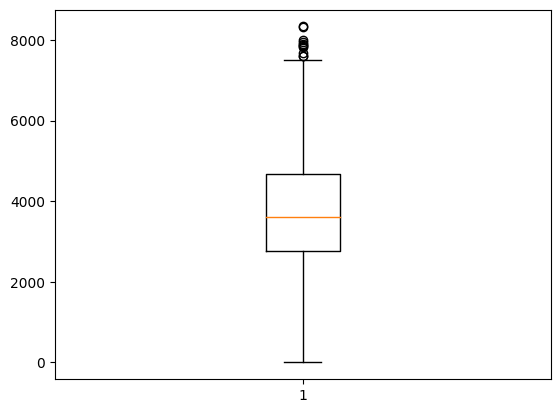

In [ ]:
plt.boxplot(new_data1['ApplicantIncome'])
plt.show()

In [ ]:
#capping - change the outlier values to upper (or) lower values
new_data1 = data.copy()
new_data1.loc[(new_data1['ApplicantIncome'] > up_1),'ApplicantIncome'] = up_1
new_data1.loc[(new_data1['ApplicantIncome'] < low_1),'ApplicantIncome'] = low_1


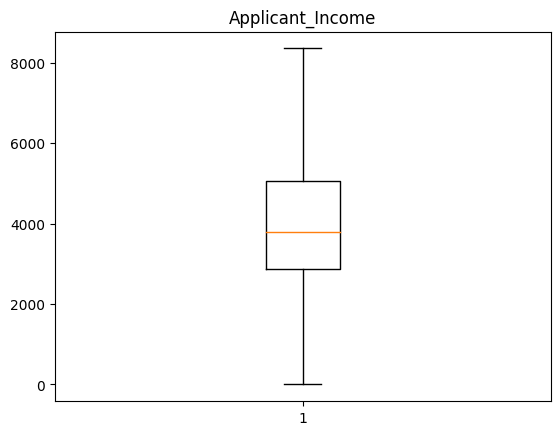

In [ ]:
plt.boxplot(new_data1['ApplicantIncome'])
plt.title('Applicant_Income')
plt.show()

In [ ]:
len(new_data1)

367

In [ ]:
#len(new_data) = 614 shows that we didn't lose any data and it has the same length that of our original dataset

In [ ]:
Q1b= data['CoapplicantIncome'].quantile(0.25)
Q2b = data['CoapplicantIncome'].quantile(0.5)
Q3b = data['CoapplicantIncome'].quantile(0.75)

In [ ]:
IQR2 = Q3b - Q1b

In [ ]:
low_2 = Q1b - (1.5 *IQR2)
up_2 = Q3b + (1.5*IQR2)

In [ ]:
print(low_2,up_2)

-3645.75 6076.25


In [ ]:
data[(data['CoapplicantIncome']<low_2) | (data['CoapplicantIncome']>up_2)].index

Int64Index([18, 25, 85, 123, 230, 237, 284, 351], dtype='int64')

In [ ]:
data.loc[(data['CoapplicantIncome'] > up_2) | (data['CoapplicantIncome'] < low_2)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural
85,LP001452,Male,Yes,2,Graduate,No,4635,8000,102.0,180.0,1.0,Rural
123,LP001652,Male,No,0,Graduate,No,2500,6414,187.0,360.0,0.0,Rural
230,LP002294,Male,No,0,Graduate,No,14911,14507,130.0,360.0,1.0,Semiurban
237,LP002325,Male,Yes,2,Not Graduate,No,6166,13983,102.0,360.0,1.0,Rural
284,LP002570,Female,Yes,2,Graduate,No,10000,11666,460.0,360.0,1.0,Urban
351,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,1.0,Rural


In [ ]:
#trimming - deleting the outlier data

new_data2= data.loc[(data['CoapplicantIncome'] <up_2) & (data['CoapplicantIncome'] >low_2)]
print("before removing outliers:",len(data))
print('after removing outliers:',len(new_data2))
print('outliers :',len(data)-len(new_data2))

before removing outliers: 367
after removing outliers: 359
outliers : 8


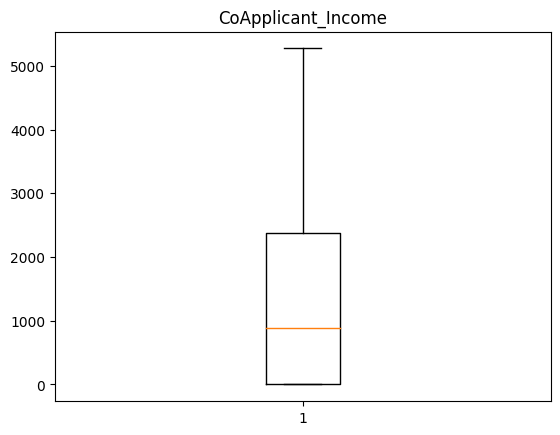

In [ ]:
plt.boxplot(new_data2['CoapplicantIncome'])
plt.title('CoApplicant_Income')
plt.show()

In [ ]:
#capping - change outlier values to upper or lower limit

new_data2 = data.copy()
new_data2.loc[(new_data2['CoapplicantIncome'] >up_2),'CoapplicantIncome'] = up_2
new_data2.loc[(new_data2['CoapplicantIncome'] <low_2),'CoapplicantIncome'] = low_2

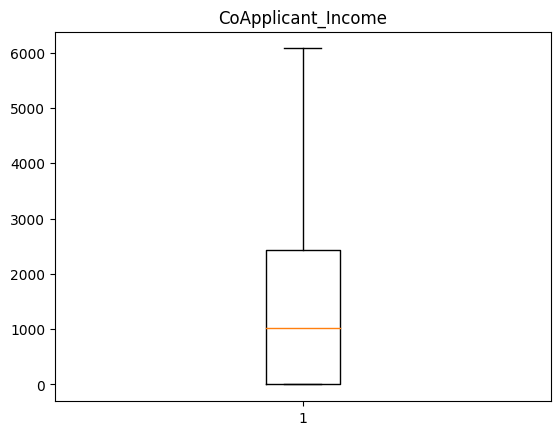

In [ ]:
plt.boxplot(new_data2['CoapplicantIncome'])
plt.title('CoApplicant_Income')
plt.show()

In [ ]:
Q1c = data['LoanAmount'].quantile(0.25)
Q2c = data['LoanAmount'].quantile(0.5)
Q3c = data['LoanAmount'].quantile(0.75)

In [ ]:
IQR3 = Q3c - Q1c

In [ ]:
low_3 = Q1c - (1.5 *IQR3)
up_3 = Q3c + (1.5*IQR3)

In [ ]:
print(low_3,up_3)

16.25 242.25


In [ ]:
data[(data['LoanAmount']<low_3) | (data['LoanAmount']>up_3)].index

Int64Index([8, 18, 24, 27, 81, 83, 91, 96, 124, 143, 144, 189, 194, 284, 285,
            331, 345, 350],
           dtype='int64')

In [ ]:
data.loc[(data['LoanAmount'] > up_3) | (data['LoanAmount'] < low_3)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
18,LP001108,Male,Yes,0,Graduate,No,9226,7916,300.0,360.0,1.0,Urban
24,LP001149,Male,Yes,0,Graduate,No,5400,4380,290.0,360.0,1.0,Urban
27,LP001169,Male,Yes,0,Graduate,No,7500,3750,275.0,360.0,1.0,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban
83,LP001446,Male,Yes,0,Graduate,No,8449,0,257.0,360.0,1.0,Rural
91,LP001483,Male,Yes,3+,Graduate,No,13518,0,390.0,360.0,1.0,Rural
96,LP001500,Male,Yes,1,Graduate,No,3333,4200,256.0,360.0,1.0,Urban
124,LP001655,Female,No,0,Graduate,No,12500,0,300.0,360.0,0.0,Urban
143,LP001791,Male,Yes,0,Graduate,Yes,32000,0,550.0,360.0,1.0,Semiurban


In [ ]:
#trimming - deleting the outlier data

new_data3 = data.loc[(data['LoanAmount'] <up_3) & (data['LoanAmount'] >low_3)]
print("before removing outliers:",len(data))
print('after removing outliers:',len(new_data3))
print('outliers :',len(data)-len(new_data3))

before removing outliers: 367
after removing outliers: 349
outliers : 18


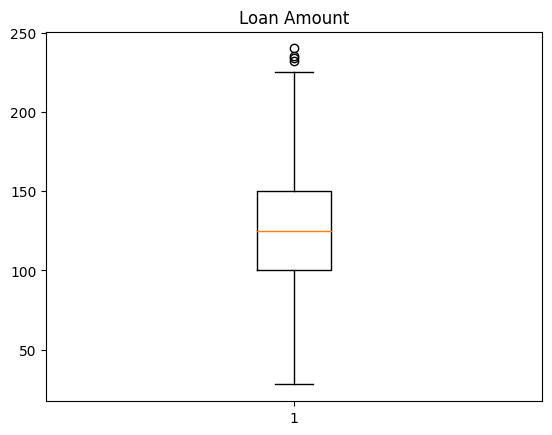

In [ ]:
plt.boxplot(new_data3['LoanAmount'])
plt.title('Loan Amount')
plt.show()


In [ ]:
#capping - change outlier values to upper or lower limit

new_data3 = data.copy()
new_data3.loc[(new_data3['LoanAmount'] > up_3),'LoanAmount'] = up_3
new_data3.loc[(new_data3['LoanAmount'] < low_3),'LoanAmount'] = low_3

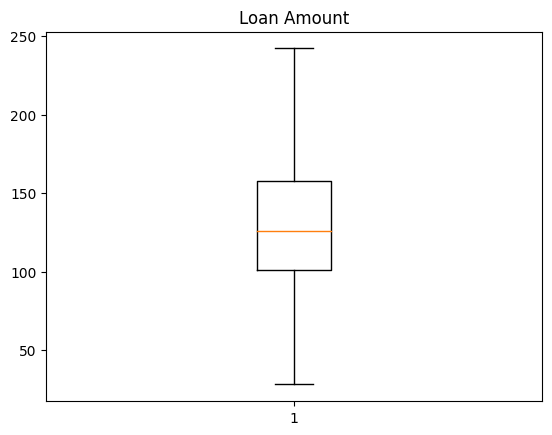

In [ ]:
plt.boxplot(new_data3['LoanAmount'])
plt.title('Loan Amount')
plt.show()

In [ ]:
# Here We can't remove the outliers in Loan_Amount_Term and Credit History

ENCODING

In [ ]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
data.dtypes

Loan_ID                int64
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Gender'] = le.fit_transform(data['Gender'])

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['Married'] = le.fit_transform(data['Married'])

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
data['Dependents'] = data['Dependents'].str.replace('+',' ')

In [ ]:
data['Dependents'].unique()

array(['0', '1', '2', '3 '], dtype=object)

In [ ]:
data['Dependents'] = data['Dependents'].astype('int32')

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [ ]:
data['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [ ]:
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [ ]:
data.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
data = pd.get_dummies(data)
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


SCALING

In [ ]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
#feature engineering

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4886
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276


In [ ]:
req_cols = ['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']

In [ ]:
x = data[req_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x.loc[:,['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']] = sc.fit_transform(x[['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']])

<ipython-input-102-a31b3f803686>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']] = sc.fit_transform(x[['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']])


In [ ]:
x.head()

,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.126182,-0.429368,0.266022,0.437674
1,-0.346506,-0.166482,0.266022,0.437674
2,0.081817,1.180807,0.266022,0.437674
3,-0.286803,-0.593671,0.266022,0.437674
4,-0.596875,-0.955139,0.266022,0.437674
